In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, Binarizer

In [3]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

    print("------------------------------\n------------------------------")

    print("Performance Evaluation")
    print(classification_report(y_test, y_pred, zero_division = 1))

In [4]:
# Load Iris dataset
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Load Breast Cancer dataset
cancer = load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target

# Split datasets into training and testing sets
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state=42)


In [5]:
# Standardizing the datasets for Naive Bayes
scaler_iris = StandardScaler()
X_iris_train_scaled = scaler_iris.fit_transform(X_iris_train)
X_iris_test_scaled = scaler_iris.fit_transform(X_iris_test)

scaler_cancer = StandardScaler()
X_cancer_train_scaled = scaler_cancer.fit_transform(X_cancer_train)
X_cancer_test_scaled = scaler_cancer.fit_transform(X_cancer_test)

In [6]:
# Function to train and evaluate Naive Bayes models
def naive_bayes_classification(X_train, X_test, y_train, y_test):
    models = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernoulliNB': BernoulliNB()}

    for name, model in models.items():
        model.fit(X_train, y_train)
        print("==============================")
        print(f"Naive Bayes - {name}\n==============================")
        evaluate_model(model, X_test, y_test)

IRIS DATASET
Naive Bayes - GaussianNB
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
------------------------------
------------------------------
Performance Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Naive Bayes - MultinomialNB
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  1 12]]
------------------------------
------------------------------
Performance Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
 

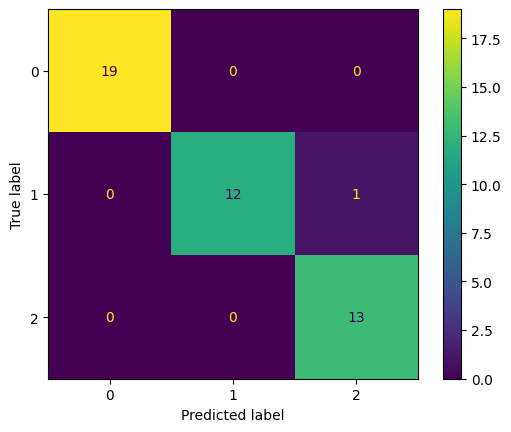

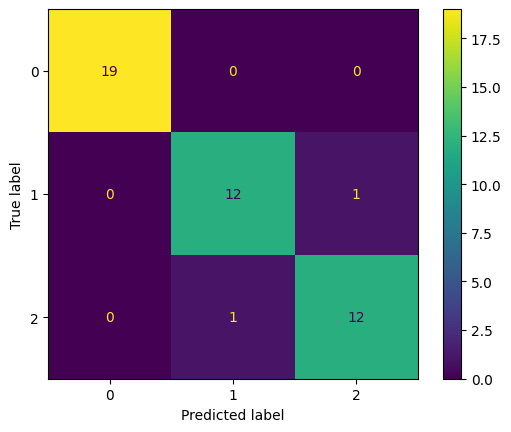

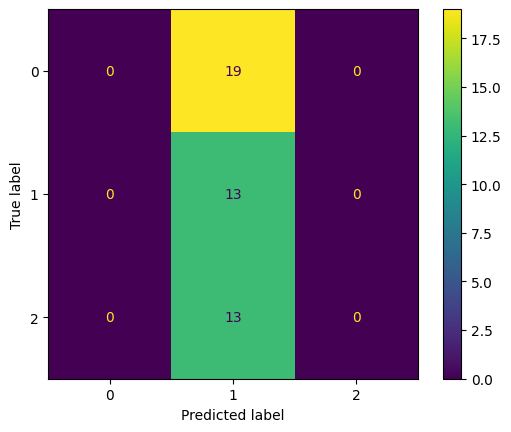

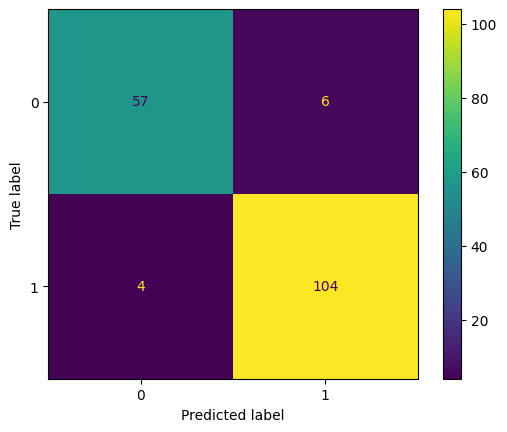

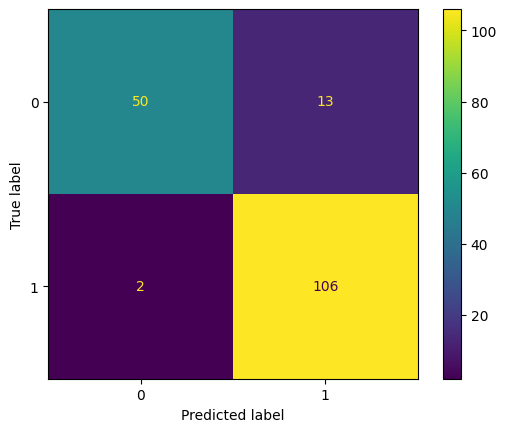

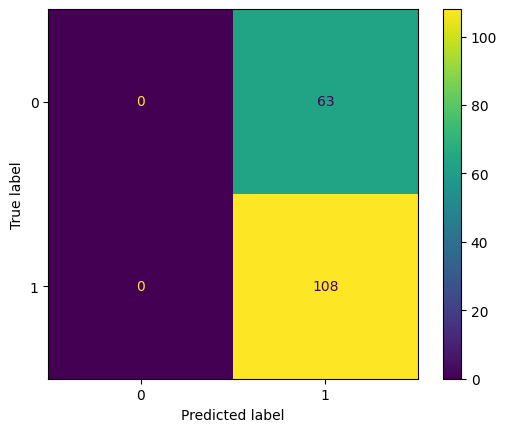

In [7]:
# Perform Naive Bayes classification on both datasets
print("IRIS DATASET")
iris_nb_results = naive_bayes_classification(X_iris_train, X_iris_test, y_iris_train, y_iris_test)
print("BREAST CANCER DATASET")
cancer_nb_results = naive_bayes_classification(X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test)

In [8]:
# Function to train and evaluate Decision Tree model
def decision_tree_classification(X_train, X_test, y_train, y_test, feature_names, target_names):
    models = {
        'DecisionTree (Gini)': DecisionTreeClassifier(criterion='gini', random_state=42),
        'DecisionTree (Entropy)': DecisionTreeClassifier(criterion='entropy', random_state=42)
        }

    for name, model in models.items():
        model.fit(X_train, y_train)
        print("==============================")
        print(f"{name} Classification")
        print("==============================")
        evaluate_model(model, X_test, y_test)
        plt.figure(figsize=(20, 15))
        plot_tree(model, filled=True, feature_names = feature_names, class_names=target_names)
        plt.show()

IRIS DATASET
DecisionTree (Gini) Classification
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
------------------------------
------------------------------
Performance Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



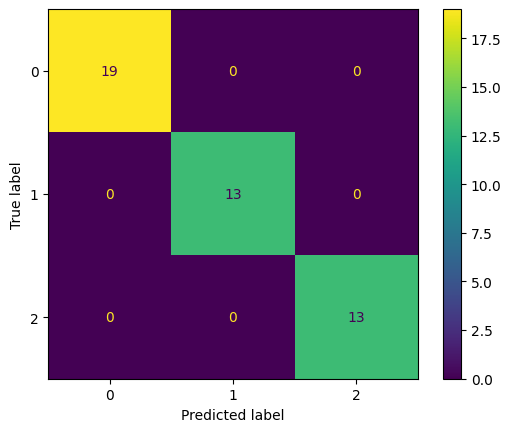

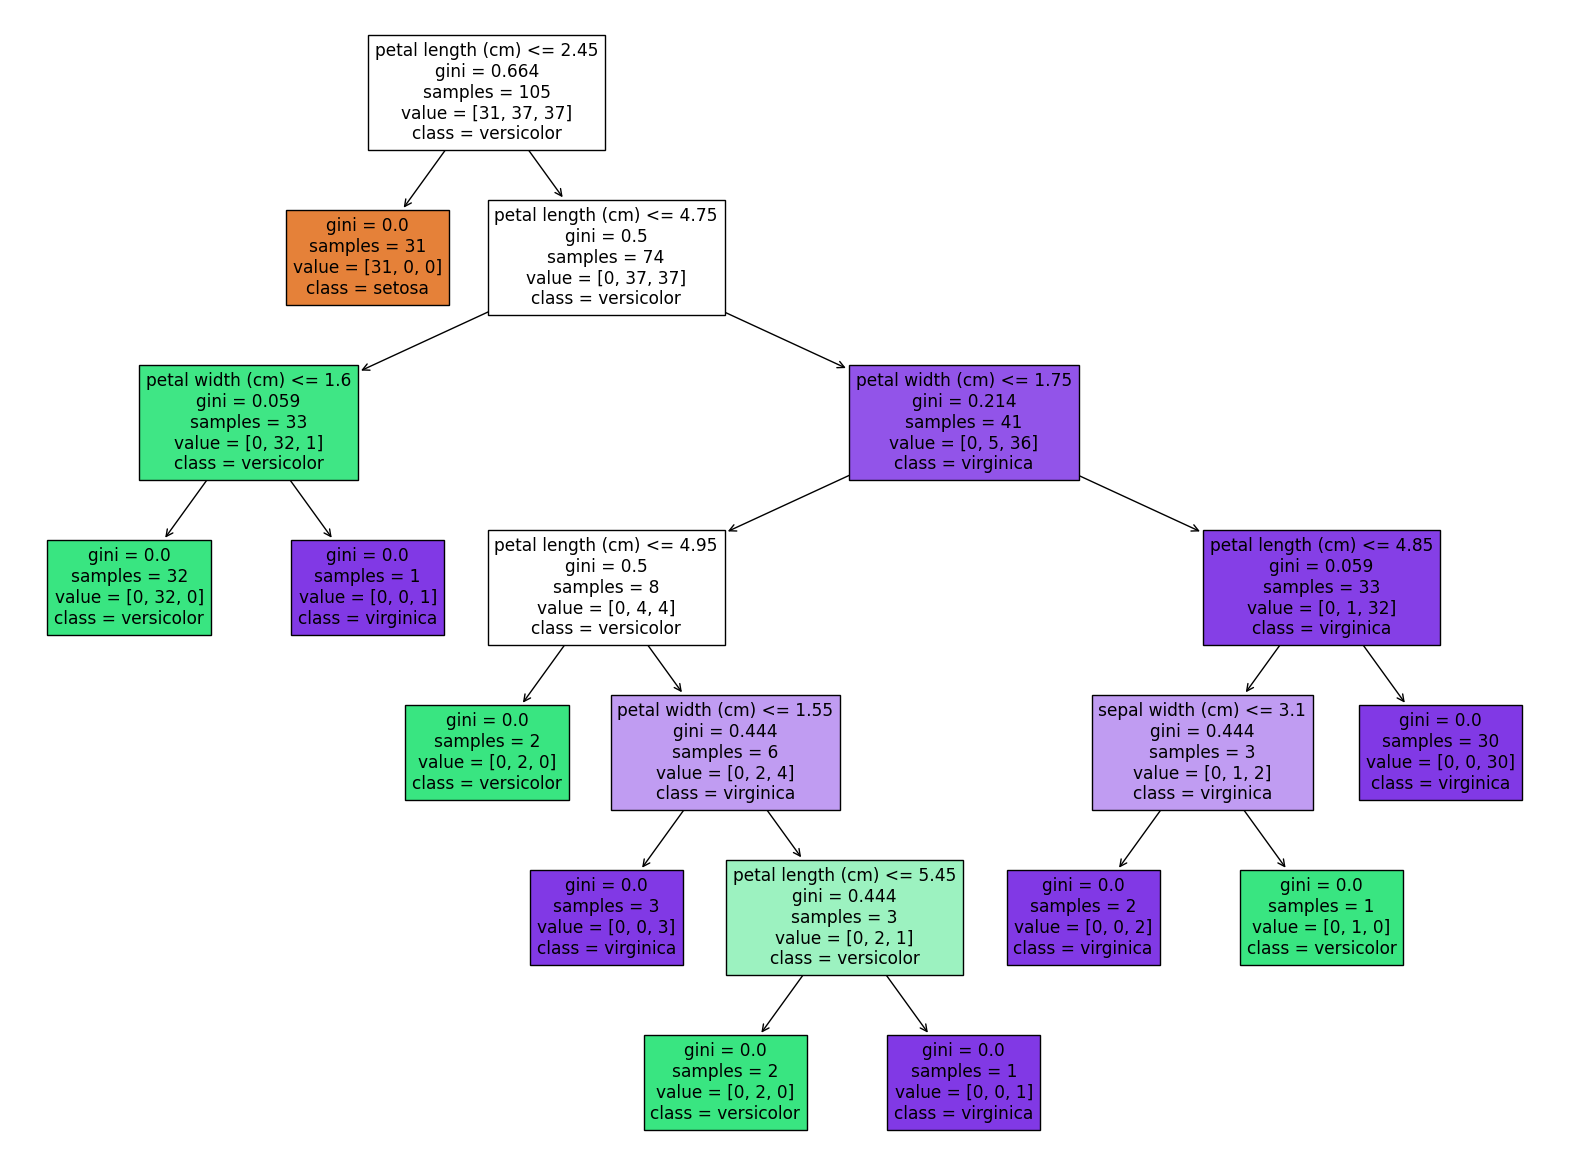

DecisionTree (Entropy) Classification
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]
------------------------------
------------------------------
Performance Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



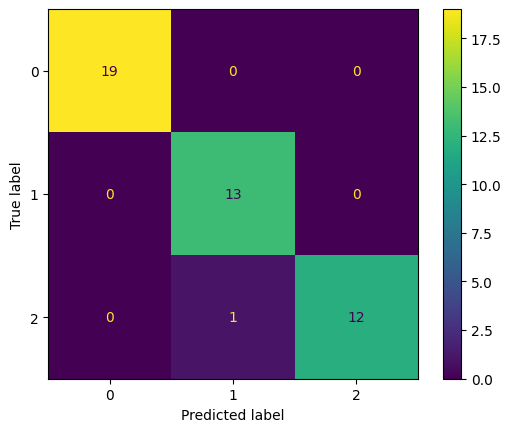

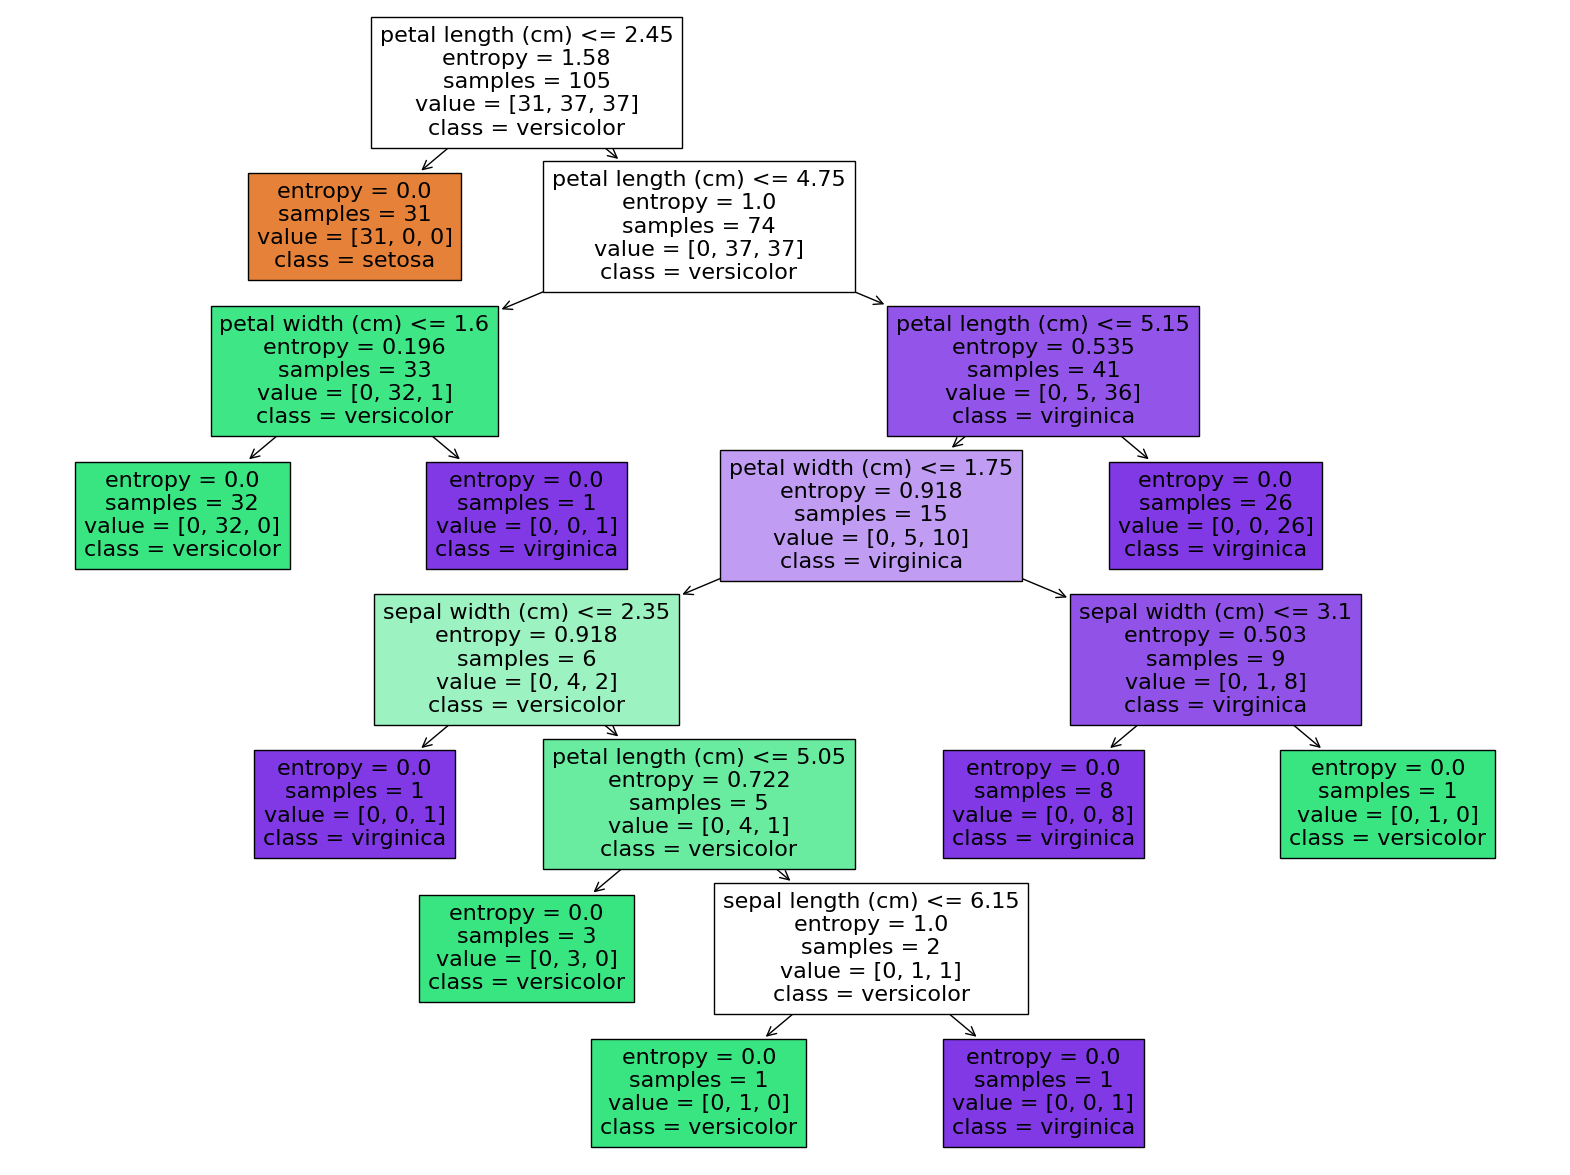

BREAST CANCER DATASET
DecisionTree (Gini) Classification
Confusion Matrix:
[[ 60   3]
 [  7 101]]
------------------------------
------------------------------
Performance Evaluation
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



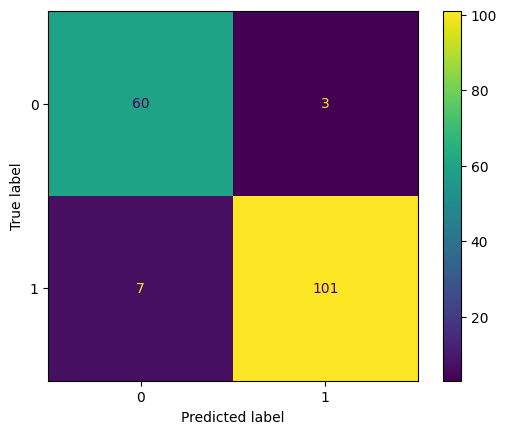

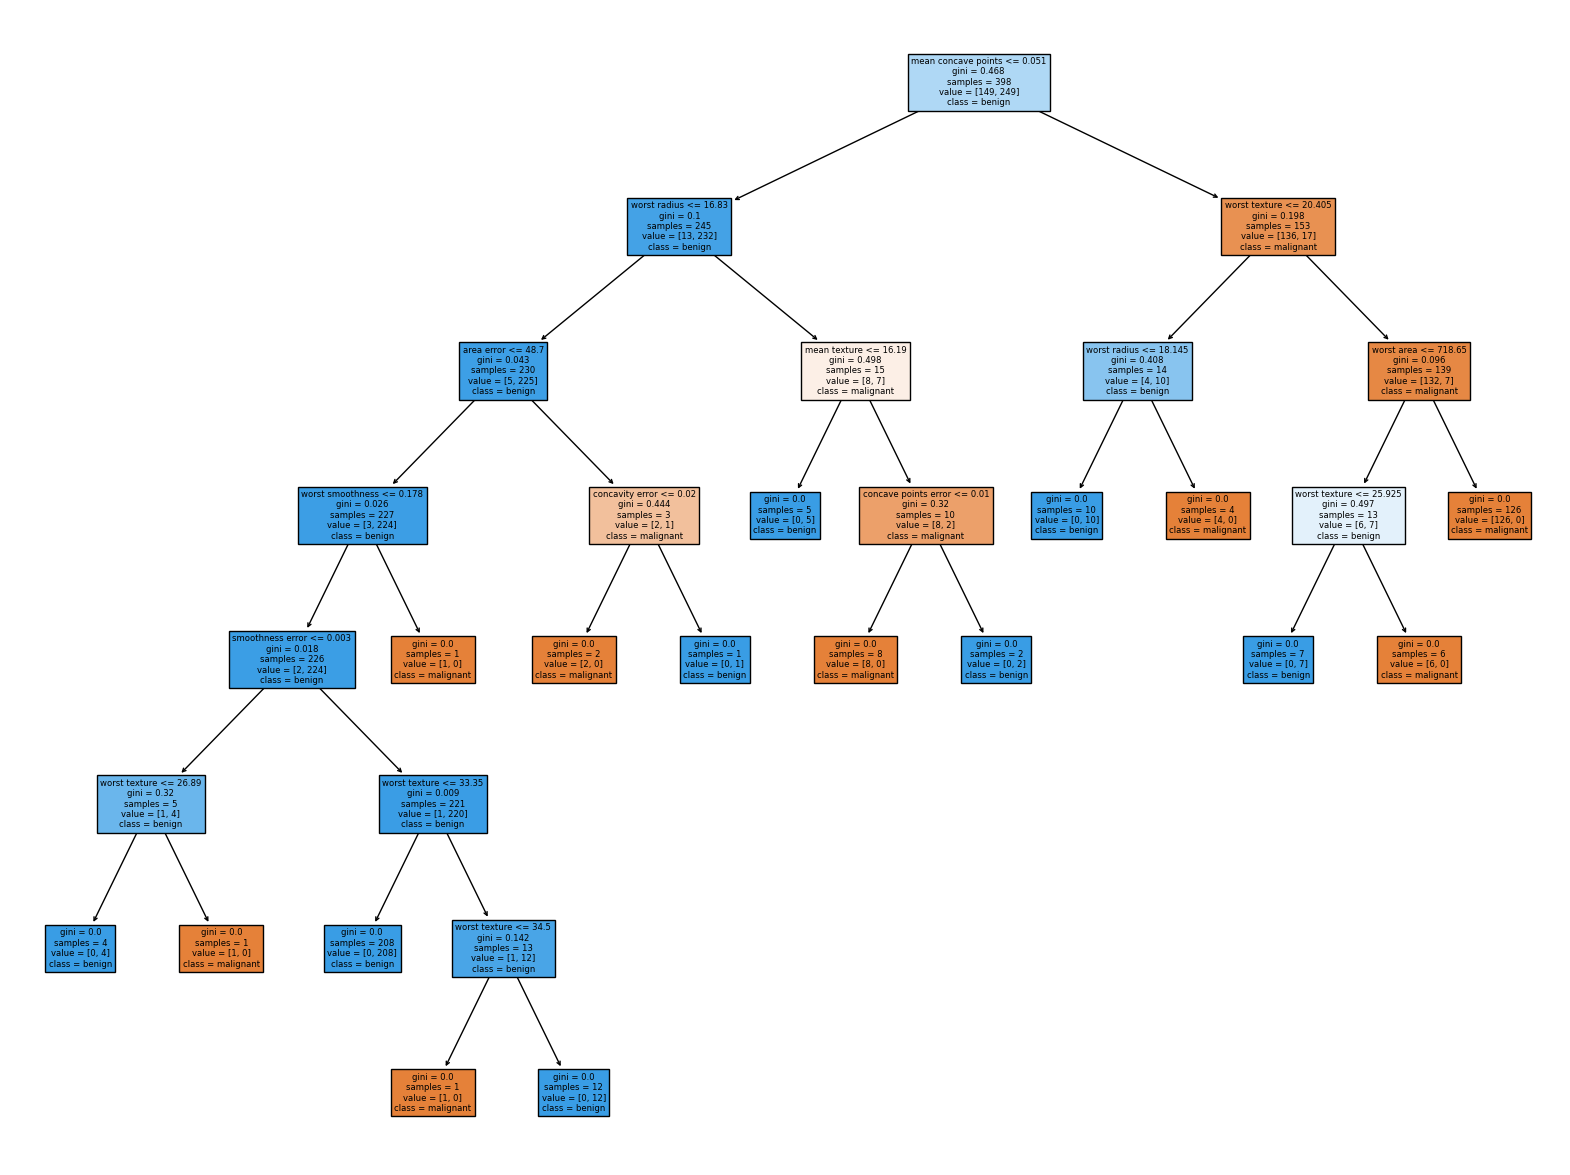

DecisionTree (Entropy) Classification
Confusion Matrix:
[[ 59   4]
 [  2 106]]
------------------------------
------------------------------
Performance Evaluation
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



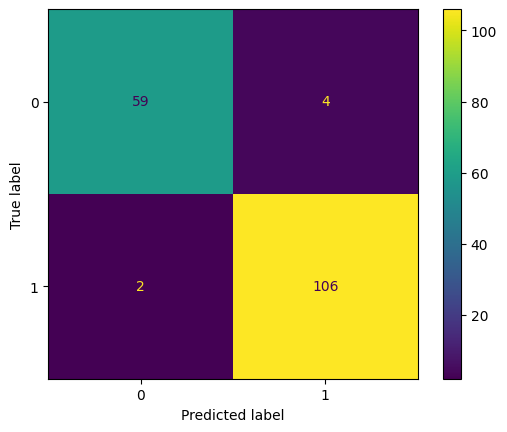

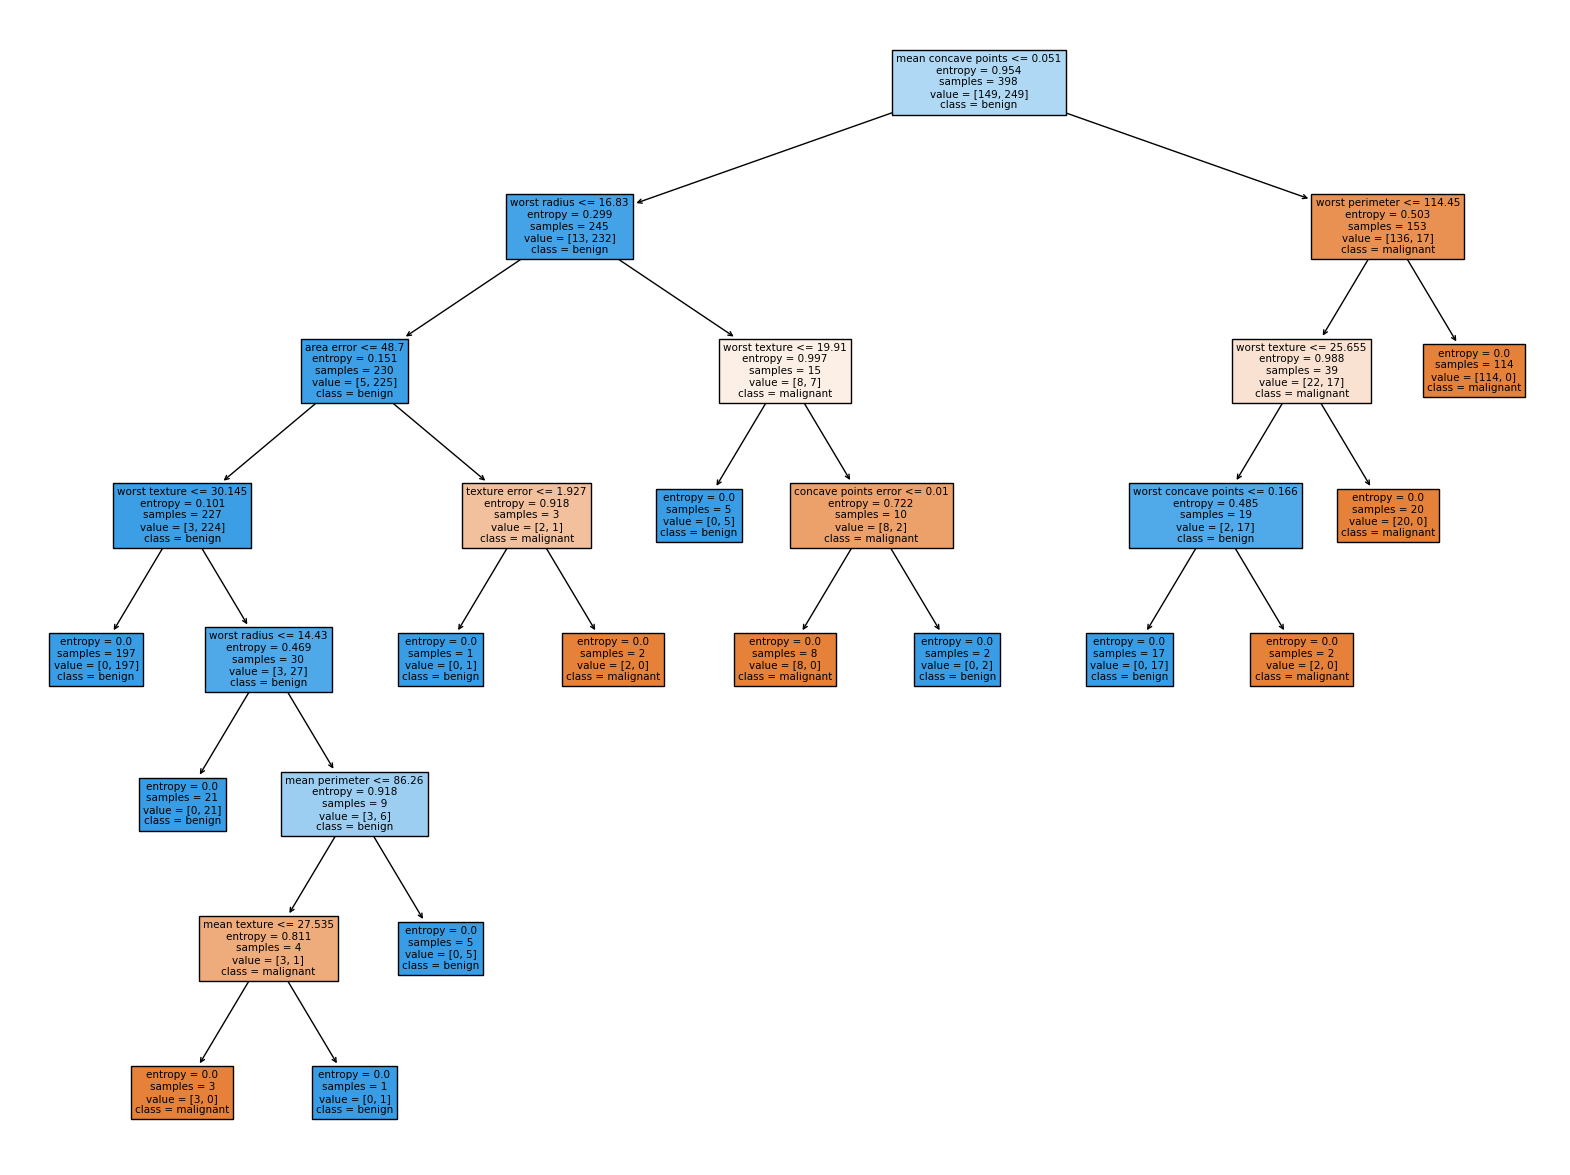

In [9]:
# Perform Decision Tree classification on both datasets
print("IRIS DATASET")
iris_dt_results_gini = decision_tree_classification(X_iris_train, X_iris_test, y_iris_train, y_iris_test, iris.feature_names, iris.target_names)
print("BREAST CANCER DATASET")
cancer_dt_results_gini = decision_tree_classification(X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test, cancer.feature_names, cancer.target_names)